# Tensorflow Introduction

# Deep learning
This is my notebook for understanding deeplearning with tensorflow.

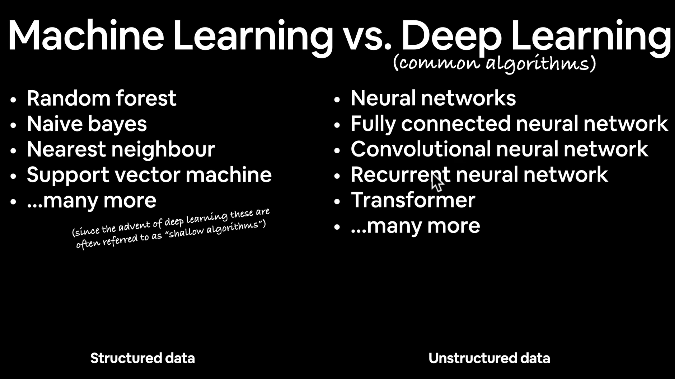

In [1]:
import tensorflow as tf

print("Tensorflow version: ",tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

assert tf.test.is_gpu_available()
assert tf.test.is_built_with_cuda()

Tensorflow version:  2.5.0
Num GPUs Available:  1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


# Creating tensors with tf.constant()

In [2]:
scalar = tf.constant(7)
print(scalar.ndim)
scalar

0


<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
vector = tf.constant([1,2,3])
print(vector.ndim)
vector

1


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3])>

In [4]:
matrix = tf.constant([[1,2],[3,4]],dtype=tf.float16)
print(matrix.ndim)
matrix

2


<tf.Tensor: shape=(2, 2), dtype=float16, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float16)>

In [5]:
tensor = tf.constant(
[
    [[1,2],[3,4]],
    [[5,6],[7,8]]
],dtype=tf.float64)
tensor

<tf.Tensor: shape=(2, 2, 2), dtype=float64, numpy=
array([[[1., 2.],
        [3., 4.]],

       [[5., 6.],
        [7., 8.]]])>

# Using tf.Variable

In [6]:
changable_tensor = tf.Variable([10, 7])
unchangable_tensor = tf.constant([10, 7])
changable_tensor, unchangable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7])>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7])>)

In [7]:
try: 
    changable_tensor[0] = 7
    changable_tensor
except: 
    print("Cant do this!!")

Cant do this!!


In [8]:
changable_tensor[0].assign(7)
changable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7])>

In [9]:
try: 
    unchangable_tensor[0].assign(100)
except:
    print("Cant do this!!")

Cant do this!!


# Creating Random tensors

## Understanding seeds
There are two types of seeds in tensorflow
- Global level random seed 
- Operation level random seed

To make sure tensors have the same generated value each time, we need to use global level random seed in conjuction with operation level random seed.

In [10]:
rand_1 = tf.random.Generator.from_seed(2)
rand_1 = rand_1.normal(shape=(3,3))
rand_2 = tf.random.Generator.from_seed(2)
rand_2 = rand_2.normal(shape=(3,3))
rand_1, rand_2, rand_1 == rand_2


(<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[-0.1012345 , -0.2744976 ,  1.4204658 ],
        [ 1.2609464 , -0.43640924, -1.9633987 ],
        [-0.06452483, -1.056841  ,  1.0019137 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[-0.1012345 , -0.2744976 ,  1.4204658 ],
        [ 1.2609464 , -0.43640924, -1.9633987 ],
        [-0.06452483, -1.056841  ,  1.0019137 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=bool, numpy=
 array([[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]])>)

In [11]:
# Shuffle a tensor(valuable when you want to shuffle the data )
tfLocal = tf
# Setting global level seed 
tfLocal.random.set_seed(42)
rand_1 = tfLocal.random.shuffle(rand_1, seed = 42)
rand_1, rand_2, rand_1 == rand_2

(<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[-0.1012345 , -0.2744976 ,  1.4204658 ],
        [ 1.2609464 , -0.43640924, -1.9633987 ],
        [-0.06452483, -1.056841  ,  1.0019137 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[-0.1012345 , -0.2744976 ,  1.4204658 ],
        [ 1.2609464 , -0.43640924, -1.9633987 ],
        [-0.06452483, -1.056841  ,  1.0019137 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 3), dtype=bool, numpy=
 array([[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]])>)

In [12]:
ones = tf.ones([3,2])
zeros = tf.zeros([3,2])
ones, zeros

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[1., 1.],
        [1., 1.],
        [1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[0., 0.],
        [0., 0.],
        [0., 0.]], dtype=float32)>)

In [13]:
import numpy as np
npA = np.arange(1,25,dtype=np.int32)
tNpA = tf.constant(npA, shape=(2,3,4))
npA,tNpA

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 <tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])>)

In [14]:
randT = []
for i in range(0,1):
    randT.append(tf.random.normal(shape=(30,30)))

for r in randT:
    print(randT)
    

[<tf.Tensor: shape=(30, 30), dtype=float32, numpy=
array([[ 3.27468514e-01, -8.42625797e-01,  3.19433689e-01,
        -1.40755188e+00, -2.38805985e+00, -1.03924787e+00,
        -5.57323217e-01,  5.39707005e-01,  1.69943225e+00,
         2.88936555e-01, -1.50661159e+00, -2.64547408e-01,
        -5.97224057e-01, -1.91711318e+00, -6.20441437e-01,
         8.50402296e-01, -4.06047940e-01, -3.02584124e+00,
         9.05846417e-01,  2.98559874e-01, -2.25615546e-01,
        -7.61644304e-01, -1.89171410e+00, -9.38471258e-01,
         7.78522134e-01, -4.73388970e-01,  9.77726936e-01,
         2.46944040e-01,  2.05737472e-01, -5.25623322e-01],
       [ 3.24100167e-01,  2.54540909e-02, -1.06384970e-01,
        -6.36947513e-01,  1.16031218e+00,  2.50735909e-01,
        -4.17285025e-01,  4.01257813e-01, -1.41454434e+00,
        -5.93185723e-01, -1.66172135e+00,  3.35671932e-01,
         1.08156286e-01,  2.34796822e-01, -5.66687644e-01,
        -3.58198434e-01,  8.86986136e-01,  5.27447641e-01,
    